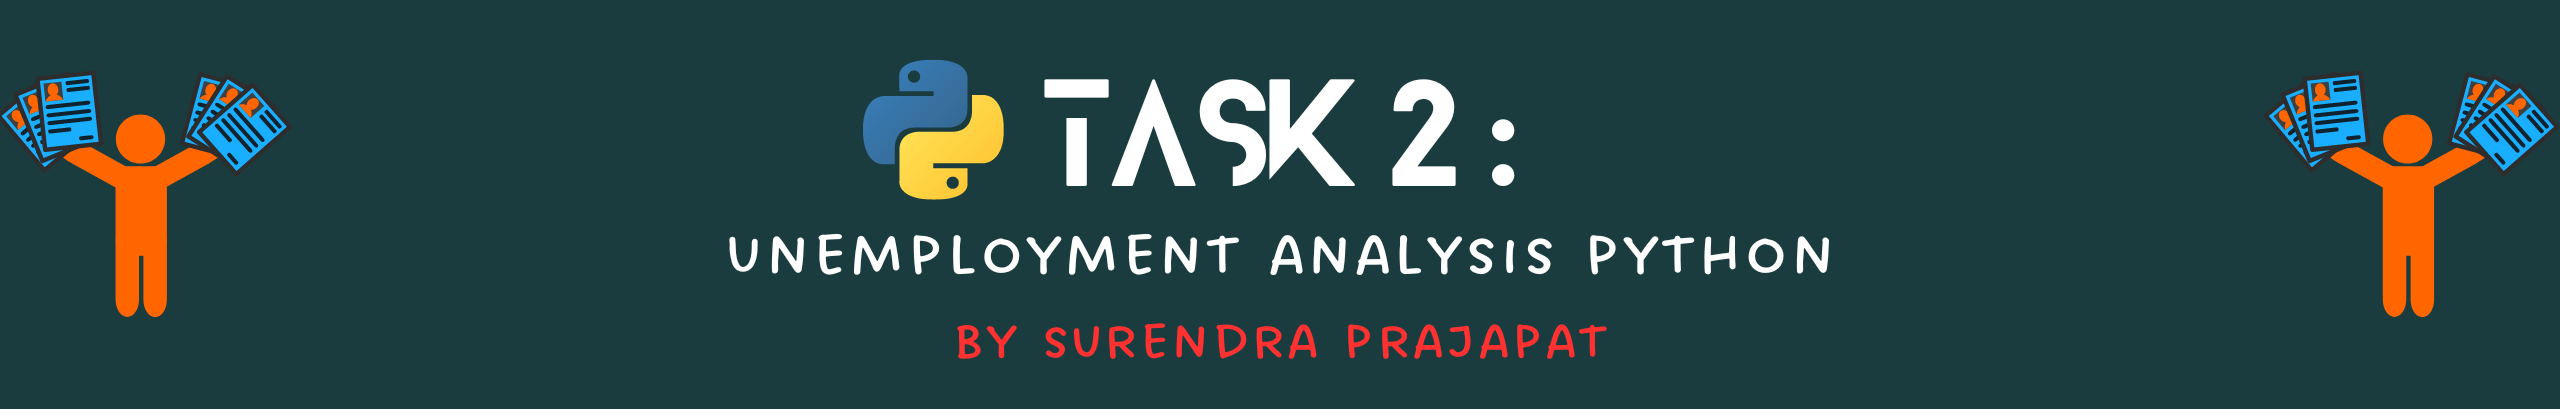

In [66]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

In [67]:
data = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [68]:
# First five row
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [69]:
# Last five row
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [70]:
# find the shape of data
data.shape

(267, 9)

In [71]:
# Checking null value present or not in data
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [73]:
data["Region"].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [74]:
data["Region.1"].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64

In [75]:
data.drop({'longitude','latitude'},axis=1,inplace = True)

In [76]:
# Statistical measure of data 
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,267.000000,2.670000e+02,267.000000
mean,12.236929,1.396211e+07,41.681573
std,10.803283,1.336632e+07,7.845419
min,0.500000,1.175420e+05,16.770000
25%,4.845000,2.838930e+06,37.265000
50%,9.650000,9.732417e+06,40.390000
75%,16.755000,2.187869e+07,44.055000
max,75.850000,5.943376e+07,69.690000


**Kurt:** Kurtosis is one of the two measures that quantify shape of of a distribution.

In [77]:
data.kurt()

<ipython-input-77-de7992f92dad>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



 Estimated Unemployment Rate (%)            7.252498
 Estimated Employed                         1.748189
 Estimated Labour Participation Rate (%)    2.212635
dtype: float64

**Skew:** A skewness value greater than 1 or less than -1 indicates a highly skewed distribution

In [78]:
data.skew()

<ipython-input-78-b3b431164adb>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



 Estimated Unemployment Rate (%)            2.224788
 Estimated Employed                         1.361110
 Estimated Labour Participation Rate (%)    0.975061
dtype: float64

# Data Visulization

<AxesSubplot:>

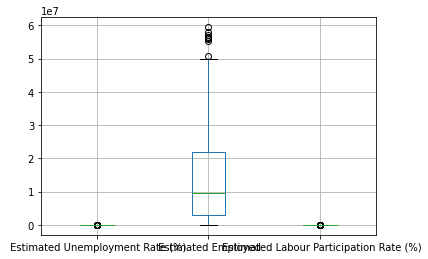

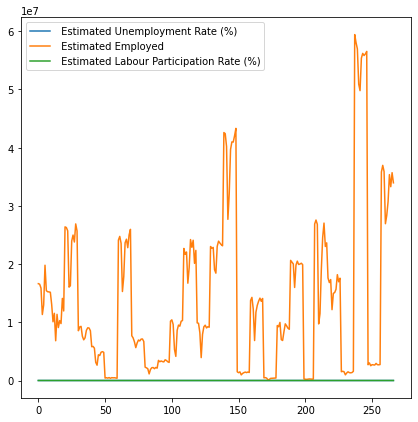

In [79]:
data.boxplot()
data.plot(figsize=(7,7))

<AxesSubplot:>

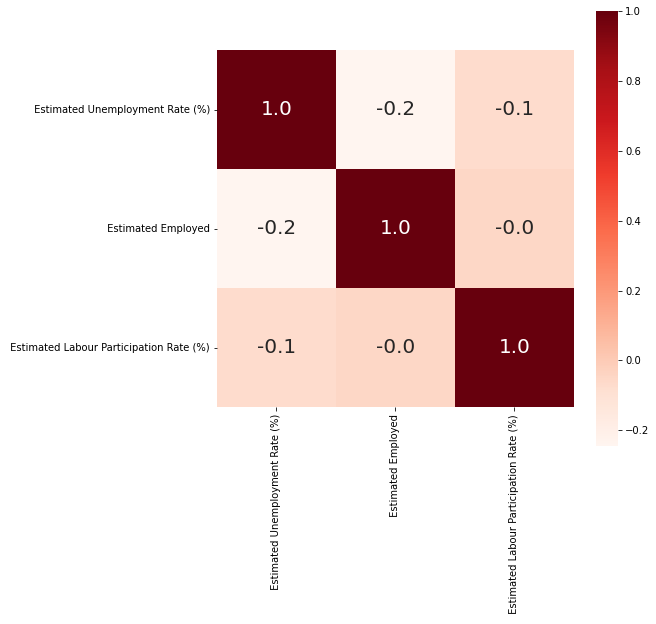

In [80]:
# constructing a heatmap to understand the correlation
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap="Reds")

Histogram


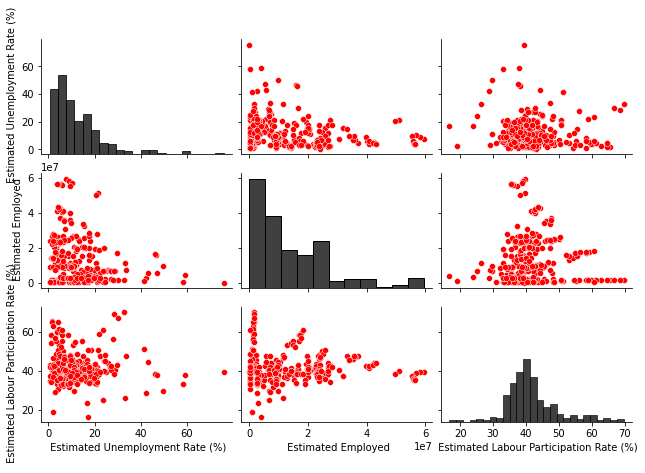

In [81]:
# Pair plot
sns.pairplot(data, height=2, aspect=1.5, diag_kws={'color':'black'}, plot_kws={'color':'red'})
plt.show()

In [82]:
fg = px.scatter(data,x='Region.1',y=' Estimated Unemployment Rate (%)',title='Unemployment rate INDIA',animation_frame=' Date',template='plotly_dark')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [83]:
fg = px.bar(data,x='Region',y=' Estimated Unemployment Rate (%)',title='Unemployment rate INDIA',animation_frame=' Date',template='plotly_dark')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()
     

In [84]:
fg = px.bar(data,x='Region.1',y=' Estimated Unemployment Rate (%)',title='Unemployment rate INDIA',animation_frame=' Date',template='plotly_dark')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

# Task 2 Completed